In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [11]:
data = pd.read_csv('C:/Users/Georage/Downloads/headbrain.csv')

In [12]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


<AxesSubplot:>

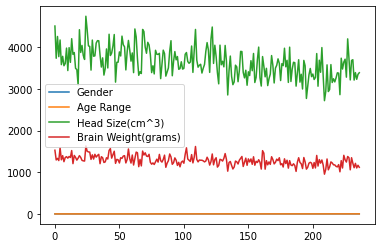

In [13]:
data.plot()

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB
None


In [15]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [16]:
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [17]:
# Cleaning the data set
data.isna().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [18]:
data = data.dropna()
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [19]:
# Locating the data set and putting them into the variables x and y
size = data["Head Size(cm^3)"]
weight = data["Brain Weight(grams)"]
print(weight)
print(size)

0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64
0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64


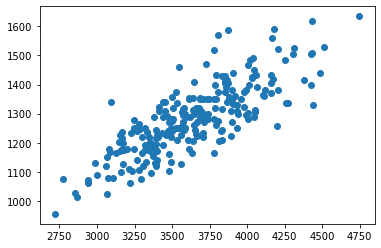

In [20]:
plt.scatter(size, weight)
plt.show()

In [21]:
x = np.array(size).reshape(-1, 1)
y = np.array(weight).reshape(-1,1)

In [22]:
# Splitting the data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3 , random_state = 0)

In [25]:
# Using Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train ,sample_weight = None)

LinearRegression()

In [26]:
y_pred = model.predict(x_test)
y_pred

array([[1303.83322923],
       [1292.73537163],
       [1381.5182324 ],
       [1253.38842198],
       [1318.46222333],
       [1284.41197844],
       [1496.53239293],
       [1255.65843831],
       [1382.02268047],
       [1335.86568183],
       [1402.20060337],
       [1138.12203741],
       [1201.43027051],
       [1331.57787322],
       [1219.84262516],
       [1231.9493789 ],
       [1280.62861789],
       [1352.26024419],
       [1242.03834035],
       [1275.83636121],
       [1236.74163559],
       [1413.80290904],
       [1349.99022786],
       [1268.77408819],
       [1324.01115213],
       [1309.8866061 ],
       [1164.35333718],
       [1282.64641018],
       [1481.90339882],
       [1085.1549898 ],
       [1188.8190687 ],
       [1269.78298434],
       [1242.03834035],
       [1374.70818342],
       [1338.89237027],
       [1225.39155396],
       [1323.75892809],
       [1372.18594305],
       [1329.05563285],
       [1244.81280475],
       [1337.63125009],
       [1145.184

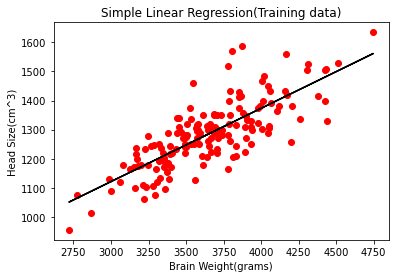

In [30]:
# Predicting the training values
plt.scatter(x_train , y_train , color = 'red')
plt.plot(x_train , model.predict(x_train), color = 'black')
plt.title('Simple Linear Regression(Training data)')
plt.ylabel('Head Size(cm^3)')
plt.xlabel('Brain Weight(grams)')
plt.show()

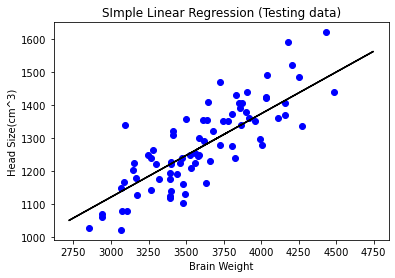

In [31]:
# Predicting the testing Results
plt.scatter(x_test, y_test , color = 'blue')
plt.plot(x_train, model.predict(x_train), color= 'black')
plt.title('SImple Linear Regression (Testing data)')
plt.ylabel('Head Size(cm^3)')
plt.xlabel('Brain Weight')
plt.show()


In [32]:
# CHecking the Value Errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE: 59.53742648595031
MSE: 5330.459082619813
RMAE: 7.716049927647585
